# Partial wave analysis
In the notebook I draw partial wave projections and show analytic structure

In [1]:
using PyPlot
using PyCall
@pyimport numpy.ma as ma

# simple flat plot
function Plot(f, x)
    fx=[f(xi) for xi in x]
    plot(x, fx)
end

# plot of function of 2 variables, 3D plot
function Plot(f, x, y)
    fx=[[xi, yi, f(xi,yi)] for xi in x for yi in y]
    surf([fxi[1] for fxi in fx], [fxi[2] for fxi in fx], [fxi[3] for fxi in fx])
end

# plot of function of 2 variables, color-codded
function DensityPlot(f, x, y)
    xy = [[xi, yi] for xi in x, yi in y]
    zv = [f((xy[i,j][1]+xy[i+1,j+1][1])/2.,
            (xy[i,j][2]+xy[i+1,j+1][2])/2.) for i in 1:(size(xy,1)-1), j in 1:(size(xy,2)-1)]
    zvmask = pycall(ma.array, Any, zv, mask=isnan.(zv))
    xv = [xy[i,j][1] for i in 1:size(xy,1), j in 1:size(xy,2)]
    yv = [xy[i,j][2] for i in 1:size(xy,1), j in 1:size(xy,2)]
    pcolor(xv, yv, zvmask)
end

DensityPlot (generic function with 1 method)

### S-wave projection with the simple model
$$
A(s,t) = \sum_l (2l+1)\, a_l(s)\, P_l(z), \quad
a_l = \int \frac{\mathrm{d}z}{2} A(s,t) P_l(z)
$$
The amplitude is $A(s,t) = g^2/(M^2-t)$ therefore the projection
$$
a_0(s) = \frac{g^2}{\sqrt{(s-4m_a^2)(s-4m_b^2)}}
\log \frac{2(M^2-m_a^2-m_b^2)-s + \sqrt{s-4m_a^2}\sqrt{s-4m_b^2}-i\epsilon}{2(M^2-m_a^2-m_b^2)-s -\sqrt{s-4m_a^2}\sqrt{s-4m_b^2} - i\epsilon}
$$

In [31]:
# masses
Ma = 0.14
Mb = 1.
M = 1.

# K\"allen function
λ(x,y,z)=x^2+y^2+z^2-2*x*y-2*y*z-2*z*x

# Break-up momentum
psq(x,y,z)=λ(x,y,z)/(4*x)

function a0(s)
    A = M^2-Ma^2-Mb^2-s/2.
    B = sqrt(s-4*Ma^2)*sqrt(s-4*Mb^2)/2.
    1./(sqrt(s-4*Ma^2)*sqrt(s-4*Mb^2))*log((A+B-0.001im)/(A-B-0.001im))
end

a0 (generic function with 1 method)

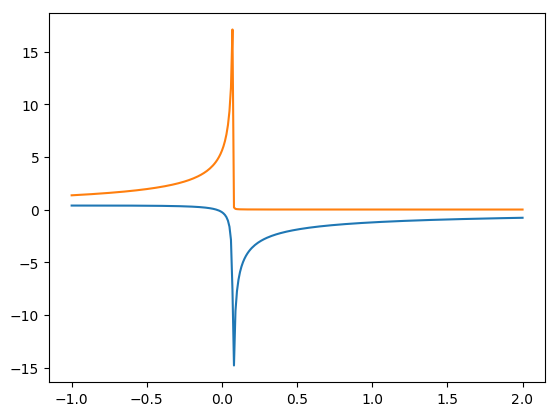

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff9bddae890>

In [33]:
Plot(x->real(a0(x+0.000001im)), -1:0.01:2)
Plot(x->imag(a0(x+0.000001im)), -1:0.01:2)

### Complex structure
Plot imaginary part in the complex plane

In [ ]:
DensityPlot(-1:0.1:5, -2:0.1:2) do x, y
    return imag(a0(x+1im*y))
end